In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
y_train[0]

5

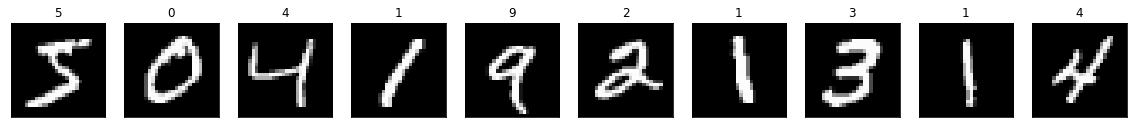

In [5]:
fig,axes = plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


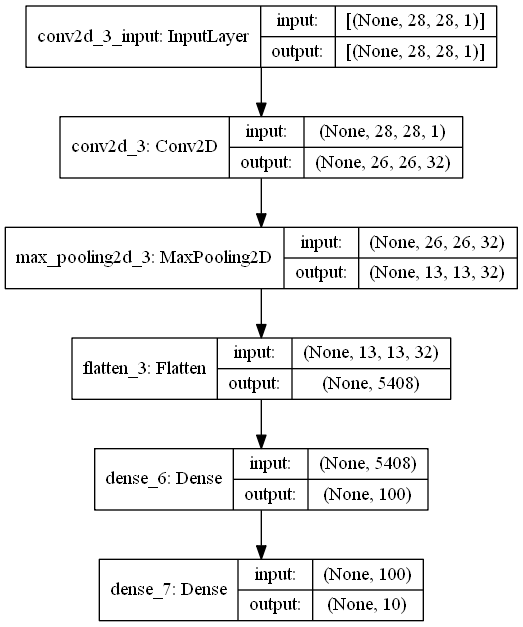

In [20]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(x_train,y_train,epochs=2,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0506 - val_accuracy: 0.9846
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0495 - val_accuracy: 0.9855


In [33]:
model.save('mnist_cnn_model.h5')

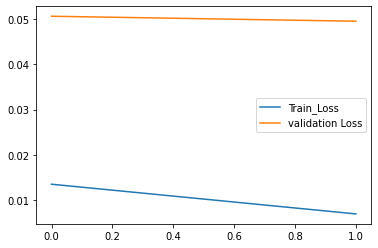

In [34]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='validation Loss')
plt.legend()

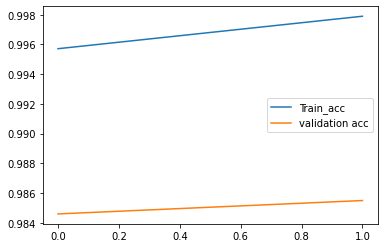

In [35]:
plt.plot(model.history.history['accuracy'],label='Train_acc')
plt.plot(model.history.history['val_accuracy'],label='validation acc')
plt.legend()

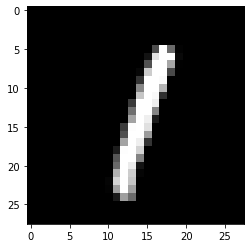

In [40]:
model = keras.models.load_model('mnist_cnn_model.h5')
plt.imshow(x_test[5],cmap='gray')

In [44]:
x = np.reshape(x_test[5],(1,28,28,1))
# x = x.astype('float32')
# x /=255
np.argmax(model.predict(x))

1